In [12]:
import requests
from bs4 import BeautifulSoup
url_list=[]
for i in range(0,5):
    page_number=str(i+1)
    url2 ='http://www.woshipm.com/category/operate/page/'+ page_number
    url_list.append(url2)

In [13]:
def get_one_page(url):
    one_page_info=[]
    r = requests.get(url)
    r.encoding = 'utf-8'
    data = BeautifulSoup(r.text, 'lxml')
    ct = data.find('div', attrs={'class':'home-post-list js-postlist'})
    myct = ct.find_all('div', attrs={'class':'postlist-item'})
    dt=[]
    
    for i in myct:
        dt_1=[]
        dt_1.append(i.find('h2',attrs={'class':'post-title'}).text) 
        dt_1.append(i.find('span', attrs={'class':'author'}).text.replace('\n',''))
        dt_1.append(i.find('time').text) 
        dt_1.append(i.find('p', attrs={'class':'des'}).text.replace('\n',''))
        meta = i.find_all('span', attrs={'class':'post-meta-item'})
        dt_1.append(meta[0].text)
        dt_1.append(meta[1].text) 
        dt.append(dt_1) 
    return dt

In [14]:
all_info = []
for url in url_list:
    all_info.extend(get_one_page(url))

In [15]:
import csv
with open('assignment1_new.csv', 'w', newline = '') as file:
    header=['title','author','time','intro','favorite','thumb']
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(all_info) 

In [18]:
import pandas as pd
form=pd.DataFrame(all_info)
form.rename(columns={form.columns[0]: "title", form.columns[1]: "author", form.columns[2]: "time", form.columns[3]: "intro",form.columns[4]: "favorite",form.columns[5]: "thumb"}, inplace=True)
form

,title,author,time,intro,favorite,thumb
0,深度复盘：转化率仅为9%，一次失败的引流课，我总结出了6个坑,木公子,2018/11/24,引流课作为被验证的有效拉新手段之一，对于运营人来说，是很重要的拉新技能；本文从什么是引流课、...,2,4
1,活动运营最愁啥？人人人人人……,姑婆那些事儿,2018/11/23,每次运营活动都要找七大姑八大姨，亲戚朋友充人数？传播活动时，总是有没用户参与的尴尬？那么，你...,2,3
2,干货 | 掌握好这6项技能，小白也能成运营高手,列克星敦,2018/11/23,无论什么形式的活动，其底层逻辑是相通的，而底层逻辑对应模块掌握得越全面，离成为运营高手也就越...,9,6
3,会员经济时代，做好会员营销的6大关键点！,阿嘞,2018/11/23,如何做好会员营销呢？掌握这六大关键点——淘宝的88vip会员、旅游景点年卡、航空公司会员、街...,0,0
4,小七带你逛起点｜网易运营总监：跟运营前辈能学到什么，不能学到什么？,起点学院,2018/11/23,怎样能成为一名抢手的运营人才呢？跟着经验丰富的运营老司机学习是非常有效的方法之一。（题图来自...,1,0
5,从1000场活动中总结出来的思维套路模型,大V姐姐,2018/11/22,作为运营人，你有分析总结行业玩法的习惯吗？本文从案例总结和反思出发，教大家如何做活动优化。众...,66,12
6,标品与非标品怎么定义?有什么区别?,Thinker韩,2018/11/22,本篇文章作者通过买家端、进店关键词、市场端三个方面来告诉大家：如何区分标品和非标品，以及其运...,4,4
7,案例+方法：如何打造现金贷产品的用户增长体系,数商云MA,2018/11/22,利用裂变的方法，搭建一个增长体系，能有效借助广告、合作等渠道构建自己的流量池，实现现金贷产品...,2,2
8,你并不知道，什么才是真正的用户需求,木木新知,2018/11/22,想要学会营销首先要搞清楚营销的本质是什么，知道用户需求是什么，了解需求痛点是什么。在做营销工...,3,1
9,用户对你的产品很满意，为什么还是不肯下单购买？,怪兽先森,2018/11/22,引流固然重要，但是最终目标还是在转化率上。如何让用户愿意购买产品呢？这里有几个小技巧分享。不...,10,5


# 人人都是产品经理网站-分类浏览-产品经营-1～5页

这5页一共有60篇文章，通过以下分析，得出了，前十五位写作量最多的作者，最多的作者-姑婆那些事儿写了其中的5篇，11月6日到11月24日，他最为勤奋。

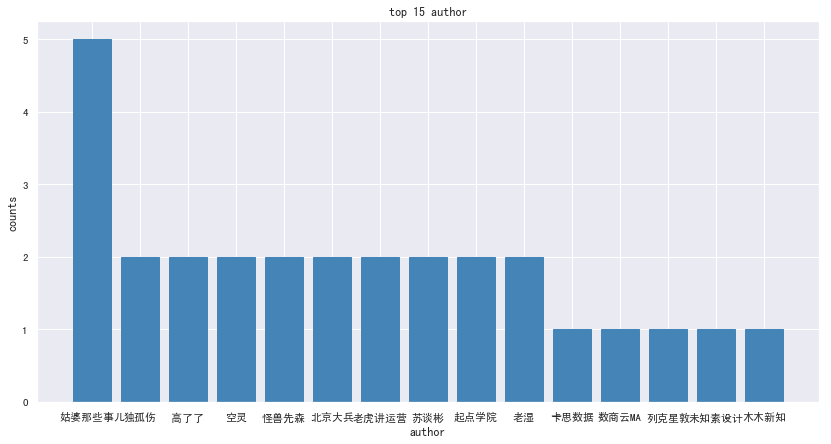

In [19]:
import matplotlib
from matplotlib import pyplot as plt

df = pd.read_csv('assignment1_new.csv') 

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 

author_counts=df['author'].value_counts()[:15].sort_values(ascending=False) 
author = pd.DataFrame(author_counts)
fig = plt.figure(figsize=(14,7)) 
plt.bar(author.index, author.author,color = '#4584b6',edgecolor = '#4584b6') 

plt.title('top 15 author') 
plt.xlabel('author')
plt.ylabel('counts')
plt.show()


# 单篇获赞最高排行

60篇文章的作者里单篇获赞数最高的前6位作者，最高赞数的文章由95后聊科技所写，获赞数为35。

Text(0.5,1,'author_thumb')

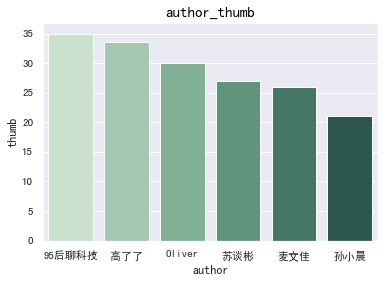

In [20]:
import seaborn as sns
sns.set(font='SimHei') 
pd_df = df.groupby(['author'])['thumb'].mean().reset_index().sort_values("thumb",ascending=False) [:6]
ax = sns.barplot(x='author', y='thumb',data=pd_df,palette=("ch:2.5,-.2,dark=.3")) 
plt.title('author_thumb', color='black', fontsize=15, weight='bold')

# 单篇获收藏最高排行

60篇文章的作者里单篇获收藏数最高的前十名，最高收藏数的文章由Oliver所写，收藏数为91.

In [21]:
import plotly
import plotly.graph_objs as go
df2 = df.groupby(['author'])['favorite'].mean().reset_index().sort_values("favorite",ascending=False)
df2_1 =df2[:10]
data = [go.Bar(x=df2.author, y=df2_1.favorite)]
plotly.offline.plot(data, filename='author_with_favorite_bar')

/Users/huashanzeng/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:621: UserWarning:

Your filename `author_with_favorite_bar` didn't end with .html. Adding .html to the end of your file.



'file:///Users/huashanzeng/author_with_favorite_bar.html'

## 这里值得关注的是，有一篇文章获得了最高的点赞量，但是收藏却较少。

Text(0.5,1,'thumb with favorite count')

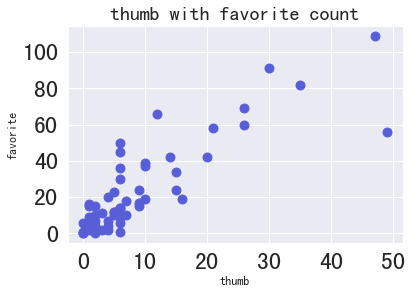

In [22]:
thumb_favorite = df[['thumb','favorite']]
ax4 = thumb_favorite.plot(kind = 'scatter',x='thumb',y='favorite',color = '#575ed8',s=80,fontsize=24)
ax4.set_title("thumb with favorite count",fontsize=20)

## 60篇文章里的作者，根据其所有文章所获的平均的点赞和收藏进行排行。

1.所有作者的所有文章平均点赞数是8.34。

2.所有作者的所有文章平均收藏数是8.22.19。

3.所有作者的所有文章平均点赞数与平均收藏数呈正相关关系。

4.所有作者的所有文章平均点赞数最高的是95后聊科技，35个赞。所有作者的所有文章平均收藏数最高的是Oliver，91个收藏。

In [35]:
import pyecharts
from pyecharts import Bar

df3 = df.groupby(['author'])['thumb'].mean().reset_index().sort_values("thumb",ascending=False)
attr = df3.author
v2 = df3.thumb
bar = Bar("authors by thumb")
bar.add("thumb", attr, v2, mark_line=["average"])
attr = df2.author
v2 = df2.favorite
bar_1 = Bar("authors by favorite")
bar_1.add("by favorite", attr, v2, mark_line=["average"])

bar

In [36]:
bar_1